<a href="https://colab.research.google.com/github/severine-baudry/P1_bike_sharing_keras/blob/main/bike_sharing_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
save_dir = "/content/gdrive/My Drive/Colab Notebooks"


Mounted at /content/gdrive


In [ ]:
import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras import initializers

In [ ]:
%ls gdrive/My\ Drive/Colab\ Notebooks

 bike-sharing-prediction.ipynb
'Copie de 01_intro_PlutonAI_colab.ipynb'
'Copy of 01_intro_PlutonAI_colab.ipynb'
'Copy of 01_practical_PlutonAI_colab (1).ipynb'
'Copy of 01_practical_PlutonAI_colab.ipynb'
'Copy of 04_convolution_digit_recognizer_PlutonAI.ipynb'
'Copy of 05_collaborative_filtering_PlutonAI.ipynb'
'Copy of 06_AE_NoisyAE.ipynb'
'Copy of 06_GAN_double_moon_colab (1).ipynb'
'Copy of 06_GAN_double_moon_colab.ipynb'
'Copy of 07_Predictions_RNN_empty.ipynb'
'Copy of 07_RNN_PlutonAI.ipynb'
'Copy of groupby.ipynb'
 covid19.ipynb
 features.csv
 GAN.ipynb
'Gradient_descent_optimization_algorithms_empty_colab(1).ipynb'
 groupby.ipynb
 images_classifier.ipynb
 kalman.ipynb
 l1-demo-0-creating-a-table-with-postgres.ipynb
 l1-demo-1-creating-a-table-with-postgres.ipynb
 least_squares.ipynb
 lesson-2-demo-1-creating-normalized-tables.ipynb
 lesson-2-demo-2-creating-denormalized-tables.ipynb
 lesson-2-demo-3-creating-fact-and-dimension-tables-with-star-schema.ipynb
 lesson-3-demo-1-2-que

In [ ]:
datadir = "gdrive/My Drive/Colab Notebooks/"

In [ ]:
features = pd.read_csv( os.path.join(datadir, "features.csv"))


In [ ]:
targets = pd.read_csv( os.path.join(datadir, "targets.csv"))

In [ ]:
features.shape

(16875, 57)

In [ ]:
features.head()

,Unnamed: 0,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
features.drop("Unnamed: 0", axis =1,inplace  =True)

In [ ]:
features

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16870,1,0,-0.088219,0.999178,0.764282,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
16871,1,0,-0.192085,1.310171,0.764282,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
16872,1,0,0.119512,0.740016,0.764282,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
16873,1,0,-0.192085,1.310171,0.519881,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
for col in features.columns :
  print(col, np.average(features[col]), np.std(features[col]))

yr 0.4877037037037037 0.49984877822943885
holiday 0.028266666666666666 0.1657337087686847
temp 0.03102173087080144 0.9963974778404634
hum -0.002760294229084045 1.00363204358706
windspeed -0.0027684816415939235 0.9952656759722616
season_1 0.23585185185185184 0.4245300411395615
season_2 0.26127407407407405 0.43932895680890316
season_3 0.2664296296296296 0.4420914861033345
season_4 0.23644444444444446 0.4248981867880619
weathersit_1 0.6620444444444444 0.47301331696339
weathersit_2 0.25665185185185185 0.4367856210922049
weathersit_3 0.08112592592592592 0.27302840524121724
weathersit_4 0.00017777777777777779 0.013332148095466774
mnth_1 0.08468148148148148 0.278407126660897
mnth_2 0.07946666666666667 0.2704657382286168
mnth_3 0.08728888888888889 0.2822579294996371
mnth_4 0.08515555555555555 0.2791130360867143
mnth_5 0.08817777777777777 0.28355327062823055
mnth_6 0.08533333333333333 0.27937708487906326
mnth_7 0.08817777777777777 0.2835532706282165
mnth_8 0.0874074074074074 0.2824311465432616


In [ ]:
features.shape

(16875, 56)

In [ ]:
# Hold out the last 60 days or so of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [174]:
input_nodes = 56

In [180]:
hidden_nodes = 10
learning_rate = 0.01
epochs = 1200

In [182]:
def bike_sharing_model(intput_nodes, hidden_nodes):
  input_layer = keras.Input(shape =(input_nodes,))
  x = keras.layers.Dense(units = hidden_nodes, activation = "sigmoid",
                       use_bias= False,
                       kernel_initializer = initializers.RandomNormal(stddev= input_nodes**-0.5)
                       )(input_layer)
  outputs = keras.layers.Dense(units = 1, use_bias = False,
                             kernel_initializer = initializers.RandomNormal(stddev= hidden_nodes**-0.5)
                             )(x)
  model = keras.Model(inputs=  input_layer, outputs = outputs)
  return model

In [183]:
model = bike_sharing_model(input_nodes, hidden_nodes)
optim = keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optim,  loss = keras.losses.MSE)
history = model.fit(train_features, train_targets["cnt"], batch_size=128, epochs = epochs,
          validation_data=(val_features, val_targets["cnt"]))

Epoch 1/1200
121/121 [==============================] - 0s 2ms/step - loss: 0.9521 - val_loss: 1.3161
Epoch 2/1200
121/121 [==============================] - 0s 1ms/step - loss: 0.8607 - val_loss: 1.2533
Epoch 3/1200
121/121 [==============================] - 0s 1ms/step - loss: 0.7921 - val_loss: 1.2269
Epoch 4/1200
121/121 [==============================] - 0s 1ms/step - loss: 0.7343 - val_loss: 1.1786
Epoch 5/1200
121/121 [==============================] - 0s 1ms/step - loss: 0.6931 - val_loss: 1.1341
Epoch 6/1200
121/121 [==============================] - 0s 1ms/step - loss: 0.6661 - val_loss: 1.1098
Epoch 7/1200
121/121 [==============================] - 0s 1ms/step - loss: 0.6473 - val_loss: 1.0846
Epoch 8/1200
121/121 [==============================] - 0s 1ms/step - loss: 0.6324 - val_loss: 1.0610
Epoch 9/1200
121/121 [==============================] - 0s 1ms/step - loss: 0.6190 - val_loss: 1.0268
Epoch 10/1200
121/121 [==============================] - 0s 1ms/step - loss: 0.606

(0.0, 0.6)

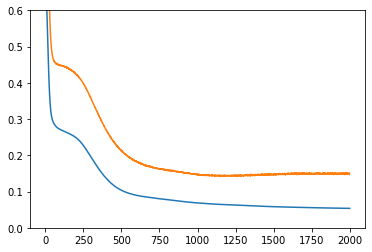

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylim(0,0.6)

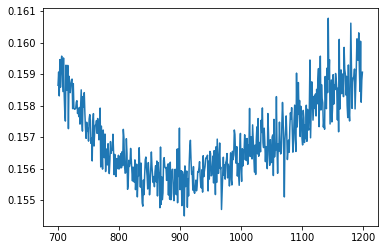

In [187]:
x0,x1 = 700,1200
plt.plot(range(x0,x1), history.history["val_loss"][x0:x1])

ValueError: ignored

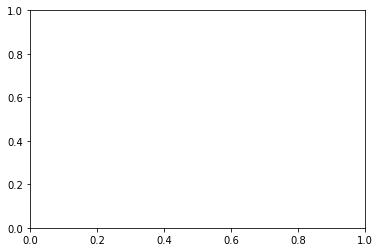

In [184]:
x0,x1 = 800,1600
plt.plot(range(x0,x1), history.history["loss"][x0:x1])

In [ ]:
y_est = model.predict(train_features)

In [ ]:
len(y_est)

15435

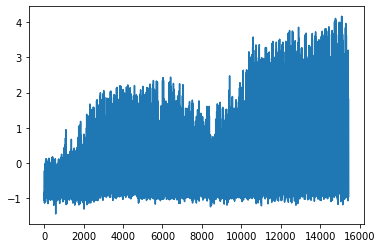

In [ ]:
plt.plot(y_est)

In [ ]:
np.max(y_est)

3.8598628

In [ ]:
np.min(y_est)

-1.3815403

In [ ]:
y_val = model.predict(val_features)

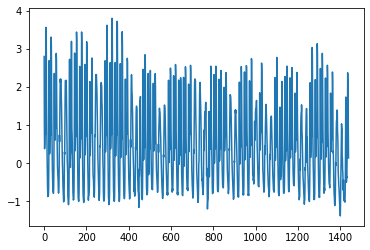

In [ ]:
plt.plot(y_val)

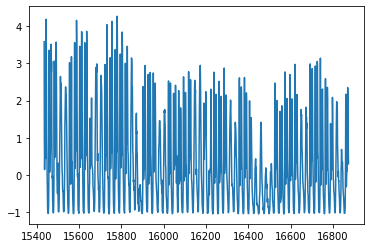

In [ ]:
plt.plot(val_targets["cnt"])

In [ ]:
model.weights

[<tf.Variable 'dense_25/kernel:0' shape=(57, 20) dtype=float32, numpy=
 array([[-8.25481796e+00, -1.80811806e+01, -4.41486475e+03, ...,
         -4.51723385e+00, -3.12168579e+02, -2.27530785e+01],
        [-1.09301396e-01,  1.16133623e-01,  2.25499216e-02, ...,
         -1.08739495e-01, -9.51689556e-02, -2.95904160e-01],
        [ 1.05519727e-01, -2.10016258e-02,  7.36726522e-02, ...,
         -2.24236086e-01, -1.10385925e-01, -2.27966860e-01],
        ...,
        [ 2.98270553e-01,  1.45780444e-01, -1.07977879e+00, ...,
         -4.03499380e-02,  1.92169324e-02,  2.07285866e-01],
        [-1.30204320e-01, -1.06639519e-01, -1.20357638e-02, ...,
          6.00480363e-02, -2.89193261e-03,  1.30332470e-01],
        [ 4.21814442e+00,  7.43233795e+01, -1.27517354e+04, ...,
         -8.66304576e-01, -4.05523896e-01,  7.21505127e+01]], dtype=float32)>,
 <tf.Variable 'dense_26/kernel:0' shape=(20, 1) dtype=float32, numpy=
 array([[ 1.94979048e+00],
        [-5.14369297e+00],
        [ 2.604370

In [ ]:
train_features.columns

Index(['Unnamed: 0', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_1',
       'season_2', 'season_3', 'season_4', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [ ]:
train_features.head()

,Unnamed: 0,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
for col in train_features.columns :
  print(col, np.average(train_features[col]))

Unnamed: 0 7717.0
yr 0.4399092970521542
holiday 0.02779397473275024
temp 0.08316770804221872
hum -0.004105997922344722
windspeed 0.0053914267500695355
season_1 0.2578555231616456
season_2 0.28564949789439587
season_3 0.29128603822481375
season_4 0.1652089407191448
weathersit_1 0.6660187884677681
weathersit_2 0.24975704567541301
weathersit_3 0.08402980239714934
weathersit_4 0.00019436345966958212
mnth_1 0.09258179462261094
mnth_2 0.08688046647230321
mnth_3 0.09543245869776482
mnth_4 0.09310009718172983
mnth_5 0.09640427599611273
mnth_6 0.09329446064139942
mnth_7 0.09640427599611273
mnth_8 0.09556203433754454
mnth_9 0.09310009718172983
mnth_10 0.06264982183349531
mnth_11 0.04658244250080985
mnth_12 0.04800777453838678
hr_0 0.04178814382896016
hr_1 0.041723356009070296
hr_2 0.04114026563006155
hr_3 0.04016844833171364
hr_4 0.040038872691933916
hr_5 0.04126984126984127
hr_6 0.04178814382896016
hr_7 0.04191771946873988
hr_8 0.04185293164885002
hr_9 0.04185293164885002
hr_10 0.04185293164885